# HR Analytics: Employee Attrition Analysis using Python

## 📌 Project Overview  
Employee attrition is a critical challenge for organizations, leading to increased hiring costs, productivity loss, and team disruption.  
This project focuses on analyzing employee data to identify the key factors that influence employees leaving the company and to generate actionable insights for HR decision-making.

The analysis includes data cleaning, exploratory data analysis (EDA), visualizations, and business-driven interpretations of patterns related to employee turnover.


## 🧩 Problem Statement  

High employee turnover negatively impacts organizational performance and financial stability.  
The objective of this project is to:

- Understand the major factors contributing to employee attrition  
- Identify high-risk employee groups  
- Provide data-driven recommendations to reduce churn  
- Support HR teams in improving employee retention strategies  

Target Variable:  
- **left** → 1 = Employee left the company  
- **left** → 0 = Employee stayed with the company  


In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 🛠 Tools & Libraries  

This project was developed using the following tools and technologies:

- Python  
- Pandas (Data manipulation & cleaning)  
- NumPy (Numerical computations)  
- Matplotlib (Data visualization)  
- Seaborn (Statistical data visualization)  


In [17]:
df=pd.read_csv('Employees.csv')

## 📂 Dataset Description  

The dataset contains HR records of employees, including performance metrics, workload, salary, and department information.

**Key Features:**  
- satisfaction_level  
- last_evaluation  
- number_project  
- average_montly_hours  
- time_spend_company  
- Work_accident  
- left (Target Variable)  
- promotion_last_5years  
- dept  
- salary  

**Dataset Shape:**  
- Rows: <add_rows_here>  
- Columns: <add_columns_here>  

Source: <Kaggle / Internal HR Dataset>


In [5]:
df.head()

,satisfactoryLevel,lastEvaluation,numberOfProjects,avgMonthlyHours,timeSpent.company,workAccident,left,promotionInLast5years,dept,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.37,0.52,2,159,3,0,1,0,sales,low
4,0.41,0.50,2,153,3,0,1,0,sales,low


In [6]:
df.info() #basic information about my dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfactoryLevel      14999 non-null  float64
 1   lastEvaluation         14999 non-null  float64
 2   numberOfProjects       14999 non-null  int64  
 3   avgMonthlyHours        14999 non-null  int64  
 4   timeSpent.company      14999 non-null  int64  
 5   workAccident           14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotionInLast5years  14999 non-null  int64  
 8   dept                   14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [7]:
df.sample(20) # to get a glance of the datasets

,satisfactoryLevel,lastEvaluation,numberOfProjects,avgMonthlyHours,timeSpent.company,workAccident,left,promotionInLast5years,dept,salary
8252,0.55,0.60,3,180,4,0,1,0,technical,medium
14278,0.71,0.76,4,148,8,0,0,0,accounting,medium
10872,0.63,0.86,4,271,3,1,0,0,support,medium
11107,0.84,0.69,4,149,3,0,0,0,marketing,medium
8274,0.86,0.93,5,223,5,0,1,0,RandD,medium
11637,0.70,0.63,3,157,2,0,0,0,RandD,medium
3699,0.44,0.48,2,226,3,0,0,0,technical,low
198,0.12,1.00,3,278,4,0,1,0,RandD,medium
8940,0.78,0.89,4,272,2,0,0,0,support,low
1346,0.84,0.82,5,240,5,0,1,0,accounting,medium


In [9]:
df.columns

Index(['satisfactoryLevel', 'lastEvaluation', 'numberOfProjects',
       'avgMonthlyHours', 'timeSpent.company', 'workAccident', 'left',
       'promotionInLast5years', 'dept', 'salary'],
      dtype='object')

In [11]:
df.size

149990

## 📌 Feature Description & Hypothesis  

This section explains each variable in the dataset along with the business assumptions about how it may impact employee attrition.

---

### 1️⃣ satisfaction_level  
Represents how satisfied an employee is with the company.  
Scale: **0 to 1** (higher = more satisfied)

**Hypothesis:**  
- Lower satisfaction levels are likely to result in **higher attrition**  
- Employees who feel unhappy or disengaged are more likely to leave  

---

### 2️⃣ last_evaluation  
The employee’s most recent performance score.

**Hypothesis:**  
- Employees with **very low scores** may leave due to poor performance pressure  
- Employees with **very high scores** may leave due to lack of recognition, better external offers, or feeling undervalued  

---

### 3️⃣ number_project  
Number of projects currently handled by the employee.

**Hypothesis:**  
- Employees with **too few projects** may feel undervalued or underutilized  
- Employees with **too many projects** may feel overworked and burned out  
- Both extremes can increase attrition risk  

---

### 4️⃣ average_montly_hours  
Average number of hours an employee works per month.

**Hypothesis:**  
- Employees working **excessive hours** may experience stress and burnout  
- Employees working **very low hours** may be disengaged or not interested in their role  
- Both scenarios can contribute to attrition  

---

### 5️⃣ time_spend_company  
Total number of years the employee has spent in the company.

**Hypothesis:**  
- Employees in the **mid-tenure range** may leave if they see no growth opportunities  
- Long-serving employees without career progression may also show higher churn  

---

### 6️⃣ Work_accident  
Indicates whether the employee has experienced a workplace accident.  
Values:  
- 0 = No  
- 1 = Yes  

**Hypothesis:**  
- Employees who experienced a work accident may feel **unsafe** or dissatisfied  
- This can increase the likelihood of resignation  

---

### 7️⃣ promotion_last_5years  
Indicates whether the employee received a promotion in the last 5 years.  
Values:  
- 0 = No  
- 1 = Yes  

**Hypothesis:**  
- Employees who **did not receive any promotion** may feel stagnant  
- Lack of growth opportunities increases attrition risk  

---

### 8️⃣ dept  
The department in which the employee works.

**Hypothesis:**  
- Some departments may have **higher attrition rates** due to workload, pressure, or culture  
- Department-wise analysis helps identify high-risk teams  

---

### 9️⃣ salary  
The salary level assigned to the employee.  
Categories:  
- Low  
- Medium  
- High  

**Hypothesis:**  
- Employees with **low salaries** may leave due to financial dissatisfaction  
- Employees with **high salaries** may leave due to better external opportunities or role stagnation  


In [12]:
df['workAccident'].value_counts()

workAccident
0    12830
1     2169
Name: count, dtype: int64

In [13]:
df['salary'].unique()

array(['low', 'medium', 'high'], dtype=object)

--Target column - left

In [15]:
df['left'].unique()

array([1, 0])

-- 1-> the employee has left the company 0 -> the employee stayed in the company

# Clean The Dataset

In [19]:
df.isnull().sum()

satisfactoryLevel        0
lastEvaluation           0
numberOfProjects         0
avgMonthlyHours          0
timeSpent.company        0
workAccident             0
left                     0
promotionInLast5years    0
dept                     0
salary                   0
dtype: int64

In [21]:
df.duplicated().sum()

np.int64(3008)

In [22]:
df.drop_duplicates(inplace=True)

In [23]:
df.shape

(11991, 10)

total data of employees that we are having is -1191

In [ ]:
check the unique value in each columns

In [24]:
df.columns

Index(['satisfactoryLevel', 'lastEvaluation', 'numberOfProjects',
       'avgMonthlyHours', 'timeSpent.company', 'workAccident', 'left',
       'promotionInLast5years', 'dept', 'salary'],
      dtype='object')

In [27]:
for col in df.columns:
    print(f"{col} --> {df[col].unique()}")

satisfactoryLevel --> [0.38 0.8  0.11 0.37 0.41 0.1  0.92 0.42 0.45 0.36 0.78 0.76 0.09 0.46
 0.4  0.89 0.82 0.84 0.87 0.57 0.43 0.13 0.39 0.74 0.79 0.44 0.9  0.71
 0.7  0.31 0.73 0.83 0.32 0.54 0.77 0.88 0.85 0.48 0.81 0.12 0.61 0.91
 0.86 0.56 0.75 0.47 0.28 0.55 0.59 0.53 0.66 0.72 0.34 0.64 0.23 0.15
 0.14 0.3  0.35 0.62 0.51 0.29 0.2  0.63 0.16 0.17 0.6  0.65 0.49 0.68
 0.67 0.26 0.99 0.5  1.   0.24 0.19 0.52 0.98 0.33 0.58 0.93 0.69 0.96
 0.97 0.27 0.22 0.95 0.94 0.18 0.21 0.25]
lastEvaluation --> [0.53 0.86 0.88 0.52 0.5  0.77 0.85 0.54 0.81 0.56 0.47 0.99 0.89 0.83
 0.95 0.57 0.92 0.87 0.49 0.62 0.51 0.46 0.8  0.7  0.78 0.97 0.79 0.59
 0.45 1.   0.84 0.94 0.96 0.48 0.82 0.91 0.98 0.55 0.74 0.9  0.93 0.71
 0.6  0.65 0.72 0.67 0.75 0.58 0.73 0.63 0.68 0.61 0.76 0.66 0.69 0.37
 0.41 0.43 0.64 0.44 0.39 0.4  0.38 0.42 0.36]
numberOfProjects --> [2 5 7 6 4 3]
avgMonthlyHours --> [157 262 272 159 153 247 259 142 135 305 137 143 160 255 282 304 139 158
 242 239 132 294 134 145 246 126

## ❓ Key Business Questions  

This analysis aims to answer the following questions:

- Does employee satisfaction level affect attrition?  
- Which departments have the highest attrition rates?  
- How does salary influence employee turnover?  
- Does workload (number of projects, working hours) contribute to burnout?  
- Is there a relationship between promotions and attrition?  
- How does tenure impact employee retention?  


## Q1. How many departments are there in the company and how many employees work in each department? 

In [7]:
df['dept'].value_counts()

dept
sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: count, dtype: int64

## Q2. how many employees are distributed among the different salary ranges ?

In [11]:
df['salary'].value_counts()

salary
low       7316
medium    6446
high      1237
Name: count, dtype: int64

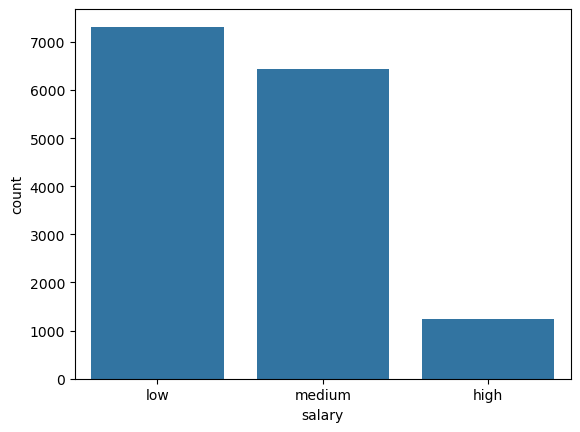

In [12]:
sns.countplot(data=df,x='salary')
plt.show()

## Q3. let see you want to see how the number of projects affects the employee attrition-if the employee stays or leaves

In [24]:
df.columns

Index(['satisfactoryLevel', 'lastEvaluation', 'numberOfProjects',
       'avgMonthlyHours', 'timeSpent.company', 'workAccident', 'left',
       'promotionInLast5years', 'dept', 'salary'],
      dtype='object')

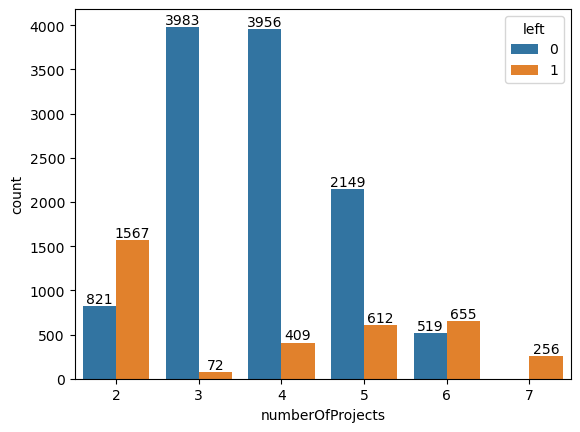

In [35]:
x1=sns.countplot( x ='numberOfProjects' ,data=df,hue='left')
x1.bar_label(x1.containers[0])
x1.bar_label(x1.containers[1])
plt.show()

## Q4. Find out the relationship between promotion and employee turnover

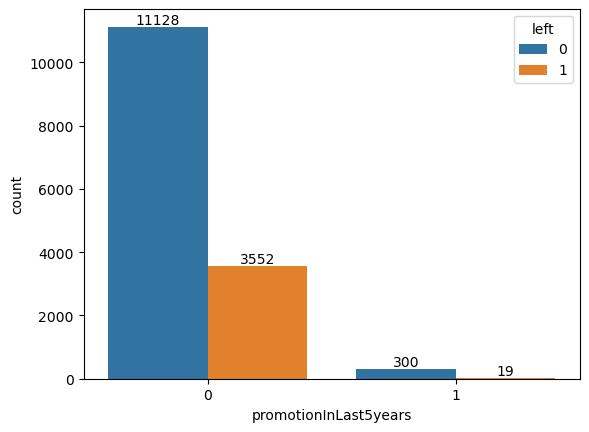

In [36]:
x2=sns.countplot(data=df,x='promotionInLast5years',hue= 'left')
x2.bar_label(x2.containers[0])
x2.bar_label(x2.containers[1])
plt.show()

## Q5. find out the relationship between from how much time the employee is in the company and the turnover

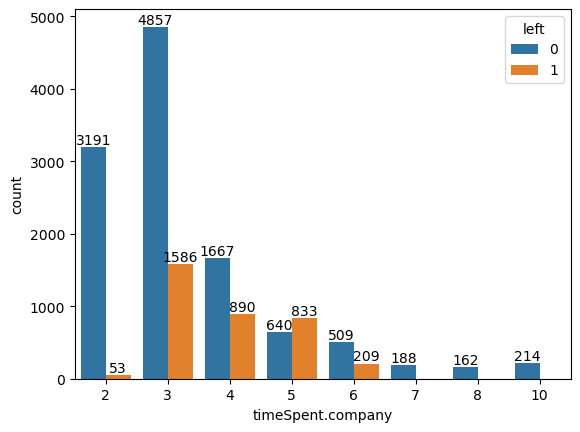

In [37]:
x3=sns.countplot(data=df, x='timeSpent.company',hue='left')
x3.bar_label(x3.containers[0])
x3.bar_label(x3.containers[1])
plt.show()
                 

In [ ]:
observation - as we can observe that
1) Employees having more time spent in the company as above 7 year stays.
2) Employee having  less experience like <3 also stay there .
3) Employee having average experience avg time spent may leave or stay also.


 ## Q6.Does the department effects the employees who are leaving?

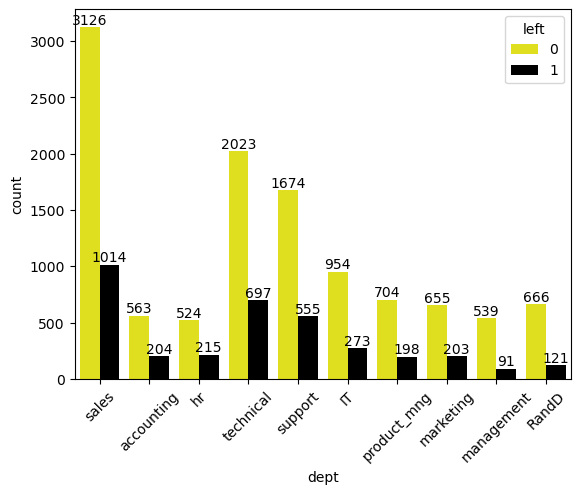

In [41]:
x4 = sns.countplot(data=df, x='dept', hue='left', palette=['yellow', 'black'])


x4.bar_label(x4.containers[0])
x4.bar_label(x4.containers[1])

plt.xticks(rotation=45)
plt.show()


## 📊 Key Insights  

Based on exploratory data analysis, the following insights were observed:

- Employees with **low satisfaction levels** show a significantly higher attrition rate  
- **Sales and Support** departments experience the highest employee churn  
- Employees in the **low salary** band are more likely to leave  
- Employees handling **too many projects** show signs of burnout-driven exits  
- Both **very low and very high working hours** correlate with increased attrition  
- Employees with **long tenure without promotion** are more likely to leave  


## 💡 Business Recommendations  

Based on the insights from the analysis, the following actions are recommended:

- Introduce employee engagement programs for low-satisfaction groups  
- Optimize workload distribution to prevent burnout  
- Implement retention bonuses and salary revisions for high-performing employees  
- Focus on improving work conditions in high-attrition departments  
- Establish structured career growth and promotion paths  
- Monitor at-risk employee segments using data-driven dashboards  


## ✅ Conclusion  

This HR Analytics project highlights how data-driven insights can help organizations reduce employee attrition.  
By identifying key churn drivers such as low satisfaction, workload imbalance, salary disparities, and departmental differences, HR teams can take proactive steps to improve employee retention.

Future improvements could include:
- Building a machine learning model to predict attrition  
- Creating an interactive dashboard  
- Automating churn monitoring pipelines  
